# Conformer: Convolution-дополненный трансформатор для распознавания речи

### Анмол Гулати, Джеймс Цинь, Чун-Чэн Чиу, Ники Пармар, Юй Чжан, Цзяхуй Юй, Вэй Хань, СибоВан, Чжэндун Чжан, Юнхуй Ву, Руомин Панг

https://arxiv.org/pdf/2005.08100v1.pdf

# Постановка задачи
---

- Изучить модель, сочетающую в себе лучшие качества трансформеров и сверток, для распознавания речи.

# Теоретическая часть
---

Недавно Трансформер и сверточная нейронная сеть (CNN) показали многообещающие результаты в автоматическом
Распознавание речи (ASR), превосходящее рекуррентные нейронные сети.

*Трансформаторные модели хороши в захвате глобальных взаимодействий на основе контента, в то время как CNNS используют
эффективно местные особенности*. 

В этой работе изучается, как объединить сверточные нейронные сети сети и трансформаторы для моделирования как локальных, так и глобальных зависимостей аудиопоследовательности эффективным по параметрам способом.

Предлагается сверточно-дополненный трансформатор для распознавания речи, названный Конформером.

Конформер значительно превосходит Трансформатор и CNN на широко используемом эталоне LibriSpeech, модель достигает WER
2,1% / 4,3% без использования языковой модели.

В последнее время трансформеры , основанные на самосознании, получили широкое распространение для моделирования последовательностей благодаря своей способности улавливать взаимодействия на больших расстояниях.
В качестве альтернативы были также использованы свертки, которые фиксируют локальный контекст постепенно через локальное восприимчивое поле слой за слоем.

Однако трансформеры и свертки имеют свои ограничения. В то время как Трансформеры хороши в моделировании
в долгосрочном глобальном контексте они менее способны извлекать
мелкозернистые локальные характерные узоры.
С другой стороны, сверточные нейронные сети (CNNS) используют локальную информацию. Одним из ограничений использования локальной связи является что нужно еще много слоев или параметров для захвата глобальной информации

В этой работе изучается, как органично сочетать свертки с self-attention в моделях автоматического распознавания речи (АРР). Выдвигается гипотеза что как глобальные, так и локальные взаимодействия важны для того, чтобы параметры были эффективны. Для достижения этой цели предлагается новое
сочетание self-attention и свертки, позволит достичь наилучших результатов.
Оба мира – self-attention (самовнимание) учится глобальному взаимодействию, в то время как
свертки эффективно улавливают относительное смещение на основе
локальной корреляции. Вводится новое сочетание self-attention и свертки

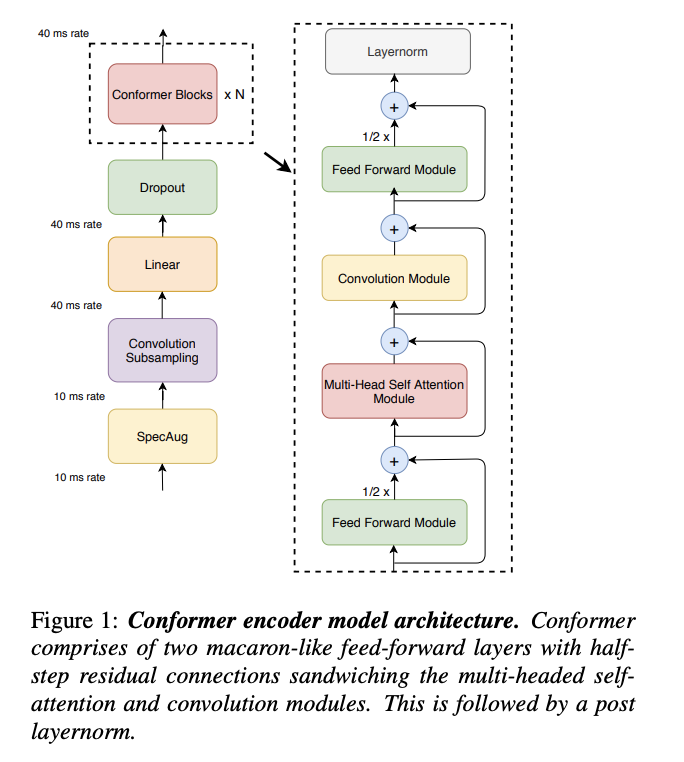

аудиокодер сначала обрабатывает входные данные с помощью свертки, а рядом conformer blocks,
как показано на рис. 1. Отличительной особенностью  модели является
использование conformerm blocks вместо transformer blocks.

Conformer block состоит из четырех модулей, уложенных друг над другом:

- feed forward module;

- multihead selfattention module;

- convolution module;

- feed forward module.

## Multihead self-attention module

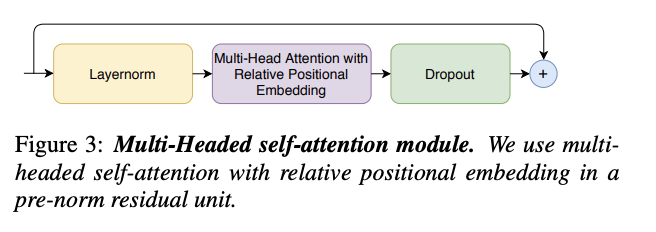

Multihead self-attention модуль используется для интеграции важной части из трансформеров.
Относительное позиционное кодирование, использующееся в self-attention, позволяет обобщить лучше на разную длину входного сигнала, и результирующий кодер будет более устойчив к дисперсии длины высказывания.
Используется layernorm с dropout, который помогает обучению и регуляризация более глубоких слоев.

## Convolution module (Модуль свертки)

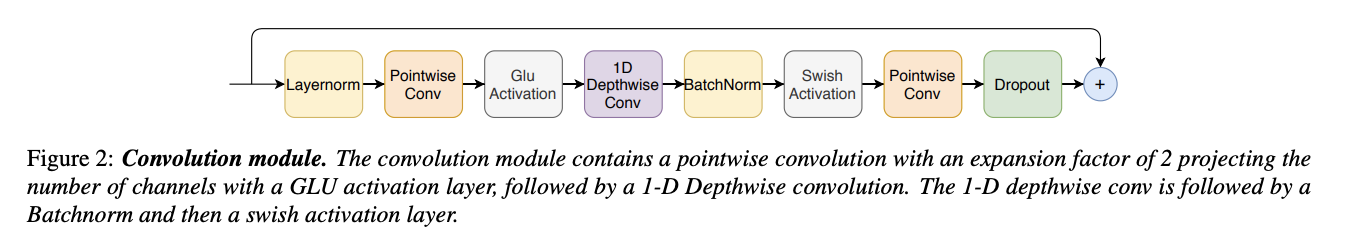

Модуль свертки представляет собой:

- layernorm;

- pointwise conv;

- glu (gated linear unit) activation;

- 1d depthwise conv;

- batchnorm - для помощи в обучении глубоким слоям;

- swish activation;

- pointwise activation;

- dropout.

## Feed forward module

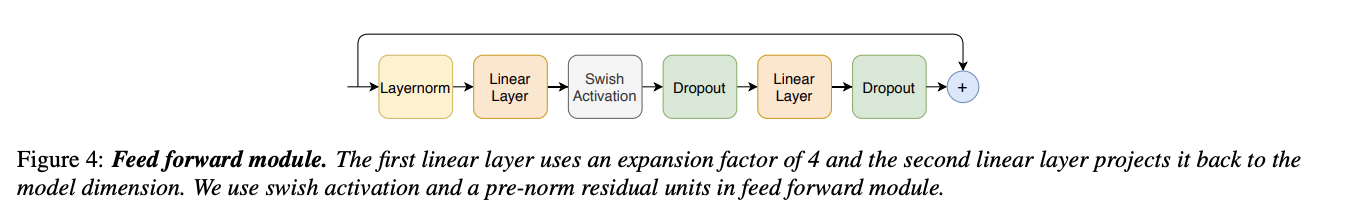

Feed forward модуль состоит из:

- layernorm;

- linear layer;

- swish activation;

- dropoout;

- linear layer;

- dropout;

- residual connection.

## Conformer block

Конформер блок состоит из двух feed forward модулей, между которыми расположены multihead self-attention модуль и convolution модуль (модуль свертки), то есть архитектура трансформера и свертки.

Эта сэндвич-структура вдохновлена Macaron-Net [18],который предлагает заменить исходный слой обратной связи (feedforward module) в трансформере на два полушаговых feedforward modules, один до слоя self-attention и один после него. Как и в Macron-Net, используются полушаговые остаточные веса в FFM. За вторым модулем прямой передачи следует
последний слой - нормальный слой. Математически это выглядит так:

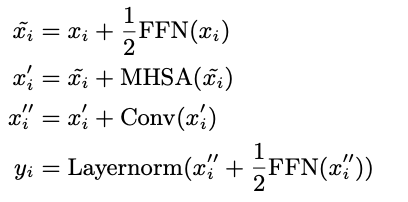

- FFN - feedforward module;

- MHSA - multihead self-attention;

- Conv - модуль свертки;

- Layernorm - слой нормализации.

# Выводы
---

В этой работе представлена Conformer-архитектура, которая интегрирует компоненты от CNN и трансформеров для сквозного распознавание речи. Была изучена важность каждого из компонент и продемонстрировано, что включение свертки имеет решающее значение для производительности conformer модели.
Модель демонстрирует лучшую точность при меньшем количестве параметров, чем
предыдущая работа над набором данных LibriSpeech и достижение новой
современной производительности на уровне 1,9% / 3,9% для теста / testother.

# Практическая часть
---

In [ ]:
# !pip install conformer-tf

In [15]:
import tensorflow as tf
# from conformer_tf import ConformerConvModule
# from conformer_tf import ConformerBlock

In [16]:
layer = ConformerConvModule(
    dim=512,
    causal=False,  # whether it is auto-regressive
    expansion_factor=2,  # what multiple of the dimension to expand for the depthwise convolution
    kernel_size=31,
    dropout=0.0,
)

x = tf.random.normal([1, 1024, 512])
x = layer(x) + x  # (1, 1024, 512)
x

<tf.Tensor: shape=(1, 1024, 512), dtype=float32, numpy=
array([[[-1.2403281 ,  1.6150457 , -0.14689954, ..., -1.7879577 ,
         -0.97261363, -0.8929987 ],
        [ 0.40036607,  0.73659563,  0.52998114, ...,  0.8646691 ,
         -0.03532992,  1.6986083 ],
        [ 0.2796106 , -0.12671809, -1.4356377 , ...,  1.6307977 ,
          0.48638222, -0.6841589 ],
        ...,
        [-0.24591713,  0.59937066,  2.0240006 , ...,  0.54721004,
          0.67045826,  1.8547053 ],
        [-0.20146511,  1.253366  ,  0.4282207 , ...,  0.13715915,
         -0.29549593,  0.8305967 ],
        [-1.3018167 , -0.80479634,  1.3478359 , ...,  1.2075588 ,
          0.84255713, -0.75427777]]], dtype=float32)>

In [17]:
x.shape

TensorShape([1, 1024, 512])

In [18]:
conformer_block = ConformerBlock(
    dim=512,
    dim_head=64,
    heads=8,
    ff_mult=4,
    conv_expansion_factor=2,
    conv_kernel_size=31,
    attn_dropout=0.0,
    ff_dropout=0.0,
    conv_dropout=0.0,
)

x = tf.random.normal([1, 1024, 512])
x = conformer_block(x)  # (1, 1024, 512)
x

<tf.Tensor: shape=(1, 1024, 512), dtype=float32, numpy=
array([[[-1.6498652 , -0.66783446, -0.12636101, ..., -0.7111049 ,
         -0.70120645, -0.12321848],
        [ 0.561063  , -0.01204735,  0.41954598, ..., -0.76631665,
         -1.8904312 , -1.0191895 ],
        [ 0.6184288 , -1.6759545 , -0.12159044, ...,  0.61488384,
         -1.4067491 ,  0.44623283],
        ...,
        [-0.24185036, -0.36163637,  0.11765314, ..., -1.3239207 ,
         -0.26838577, -1.2143918 ],
        [-0.50326806,  1.0410063 , -1.165291  , ...,  1.1879312 ,
          0.91516423,  0.1207095 ],
        [ 0.32096577, -2.4625423 , -0.9318491 , ..., -1.4141805 ,
          0.05321088, -0.52316695]]], dtype=float32)>

In [19]:
x.shape

TensorShape([1, 1024, 512])

In [20]:
import einops
import tensorflow as tf
from einops import rearrange
from einops.layers.tensorflow import Rearrange

## ConformerBlock

In [23]:
class Swish(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(Swish, self).__init__(**kwargs)

    def call(self, inputs):
        return inputs * tf.sigmoid(inputs)


class GLU(tf.keras.layers.Layer):
    def __init__(self, dim, **kwargs):
        super(GLU, self).__init__(**kwargs)
        self.dim = dim

    def call(self, inputs):
        out, gate = tf.split(inputs, 2, axis=self.dim)
        return out * tf.sigmoid(gate)


class DepthwiseLayer(tf.keras.layers.Layer):
    def __init__(self, chan_in, chan_out, kernel_size, padding, **kwargs):
        super(DepthwiseLayer, self).__init__(**kwargs)
        self.padding = padding
        self.chan_in = chan_in
        self.conv = tf.keras.layers.Conv1D(chan_out, 1, groups=chan_in)

    def call(self, inputs):
        inputs = tf.reshape(inputs, [-1])
        padded = tf.zeros(
            [self.chan_in * self.chan_in] - tf.shape(inputs), dtype=inputs.dtype
        )
        inputs = tf.concat([inputs, padded], 0)
        inputs = tf.reshape(inputs, [-1, self.chan_in, self.chan_in])

        return self.conv(inputs)


class Scale(tf.keras.layers.Layer):
    def __init__(self, scale, fn, **kwargs):
        super(Scale, self).__init__(**kwargs)
        self.scale = scale
        self.fn = fn

    def call(self, inputs, **kwargs):
        return self.fn(inputs, **kwargs) * self.scale


class PreNorm(tf.keras.layers.Layer):
    def __init__(self, dim, fn, **kwargs):
        super(PreNorm, self).__init__(**kwargs)
        self.norm = tf.keras.layers.LayerNormalization(axis=-1)
        self.fn = fn

    def call(self, inputs, **kwargs):
        inputs = self.norm(inputs)
        return self.fn(inputs, **kwargs)


class FeedForward(tf.keras.layers.Layer):
    def __init__(self, dim, mult=4, dropout=0.0, **kwargs):
        super(FeedForward, self).__init__(**kwargs)
        self.net = tf.keras.Sequential(
            [
                tf.keras.layers.Dense(dim * mult, activation=Swish()),
                tf.keras.layers.Dropout(dropout),
                tf.keras.layers.Dense(dim, input_dim=dim * mult),
                tf.keras.layers.Dropout(dropout),
            ]
        )

    def call(self, inputs):
        return self.net(inputs)


class BatchNorm(tf.keras.layers.Layer):
    def __init__(self, causal, **kwargs):
        super(BatchNorm, self).__init__(**kwargs)
        self.causal = causal

    def call(self, inputs):
        if not self.causal:
            return tf.keras.layers.BatchNormalization(axis=-1)(inputs)
        return tf.identity(inputs)


class ConformerConvModule(tf.keras.layers.Layer):
    def __init__(
        self,
        dim,
        causal=False,
        expansion_factor=2,
        kernel_size=31,
        dropout=0.0,
        **kwargs
    ):
        super(ConformerConvModule, self).__init__(**kwargs)

        inner_dim = dim * expansion_factor
        if not causal:
            padding = (kernel_size // 2, kernel_size // 2 - (kernel_size + 1) % 2)
        else:
            padding = (kernel_size - 1, 0)

        self.net = tf.keras.Sequential(
            [
                tf.keras.layers.LayerNormalization(axis=-1),
                Rearrange("b n c -> b c n"),
                tf.keras.layers.Conv1D(filters=inner_dim * 2, kernel_size=1),
                GLU(dim=1),
                DepthwiseLayer(
                    inner_dim, inner_dim, kernel_size=kernel_size, padding=padding
                ),
                BatchNorm(causal=causal),
                Swish(),
                tf.keras.layers.Conv1D(filters=dim, kernel_size=1),
                tf.keras.layers.Dropout(dropout),
            ]
        )

    def call(self, inputs):
        return self.net(inputs)


class ConformerBlock(tf.keras.layers.Layer):
    def __init__(
        self,
        dim,
        dim_head=64,
        heads=8,
        ff_mult=4,
        conv_expansion_factor=2,
        conv_kernel_size=31,
        attn_dropout=0.0,
        ff_dropout=0.0,
        conv_dropout=0.0,
        **kwargs
    ):
        super(ConformerBlock, self).__init__(**kwargs)
        self.ff1 = FeedForward(dim=dim, mult=ff_mult, dropout=ff_dropout)
        self.attn = Attention(
            dim=dim, dim_head=dim_head, heads=heads, dropout=attn_dropout
        )
        self.conv = ConformerConvModule(
            dim=dim,
            causal=False,
            expansion_factor=conv_expansion_factor,
            kernel_size=conv_kernel_size,
            dropout=conv_dropout,
        )
        self.ff2 = FeedForward(dim=dim, mult=ff_mult, dropout=ff_dropout)

        self.attn = PreNorm(dim, self.attn)
        self.ff1 = Scale(0.5, PreNorm(dim, self.ff1))
        self.ff2 = Scale(0.5, PreNorm(dim, self.ff2))

        self.post_norm = tf.keras.layers.LayerNormalization(axis=-1)

    def call(self, inputs, mask=None):
        inputs = self.ff1(inputs) + inputs
        inputs = self.attn(inputs, mask=mask) + inputs
        inputs = self.conv(inputs) + inputs
        inputs = self.ff2(inputs) + inputs
        inputs = self.post_norm(inputs)
        return inputs

## Attention

In [24]:
class Attention(tf.keras.layers.Layer):
    def __init__(
        self, dim, heads=8, dim_head=64, dropout=0.0, max_pos_emb=512, **kwargs
    ):
        super(Attention, self).__init__(**kwargs)
        inner_dim = dim_head * heads
        self.heads = heads
        self.scale = dim_head ** -0.5

        self.to_q = tf.keras.layers.Dense(inner_dim, use_bias=False)
        self.to_kv = tf.keras.layers.Dense(inner_dim * 2, use_bias=False)
        self.to_out = tf.keras.layers.Dense(dim)

        self.max_pos_emb = max_pos_emb
        self.rel_pos_emb = tf.keras.layers.Embedding(2 * max_pos_emb + 1, dim_head)

        self.dropout = tf.keras.layers.Dropout(dropout)

    def call(self, inputs, context=None, mask=None, context_mask=None):
        n = inputs.shape[-2]
        heads = self.heads
        max_pos_emb = self.max_pos_emb
        if context is None:
            has_context = False
            context = inputs
        else:
            has_context = True

        kv = tf.split(self.to_kv(context), num_or_size_splits=2, axis=-1)
        q, k, v = (self.to_q(inputs), *kv)

        q, k, v = map(
            lambda t: rearrange(t, "b n (h d) -> b h n d", h=heads), (q, k, v)
        )
        dots = tf.einsum("b h i d, b h j d -> b h i j", q, k) * self.scale

        seq = tf.range(n)
        dist = rearrange(seq, "i -> i ()") - rearrange(seq, "j -> () j")
        dist = (
            tf.clip_by_value(
                dist, clip_value_min=-max_pos_emb, clip_value_max=max_pos_emb
            )
            + max_pos_emb
        )
        rel_pos_emb = self.rel_pos_emb(dist)
        pos_attn = tf.einsum("b h n d, n r d -> b h n r", q, rel_pos_emb) * self.scale
        dots = dots + pos_attn

        if mask is not None or context_mask is not None:
            if mask is not None:
                mask = tf.ones(*inputs.shape[:2])
            if not has_context:
                if context_mask is None:
                    context_mask = mask
            else:
                if context_mask is None:
                    context_mask = tf.ones(*context.shape[:2])
            mask_value = -tf.experimental.numpy.finfo(dots.dtype).max
            mask = rearrange(mask, "b i -> b () i ()") * rearrange(
                context_mask, "b j -> b () () j"
            )
            dots = tf.where(mask, mask_value, dots)

        attn = tf.nn.softmax(dots, axis=-1)

        out = tf.einsum("b h i j, b h j d -> b h i d", attn, v)
        out = rearrange(out, "b h n d -> b n (h d)")
        out = self.to_out(out)
        return self.dropout(out)

# Список использованных источников
---

[1] C.-C. Chiu, T. N. Sainath, Y. Wu, R. Prabhavalkar, P. Nguyen,
Z. Chen, A. Kannan, R. J. Weiss, K. Rao, E. Gonina et al., “Stateof-the-art speech recognition with sequence-to-sequence models,”
in 2018 IEEE International Conference on Acoustics, Speech and
Signal Processing (ICASSP). IEEE, 2018, pp. 4774–4778.

[2] K. Rao, H. Sak, and R. Prabhavalkar, “Exploring architectures,
data and units for streaming end-to-end speech recognition with
rnn-transducer,” in 2017 IEEE Automatic Speech Recognition and
Understanding Workshop (ASRU). IEEE, 2017, pp. 193–199.

[3] Y. He, T. N. Sainath, R. Prabhavalkar, I. McGraw, R. Alvarez,
D. Zhao, D. Rybach, A. Kannan, Y. Wu, R. Pang, Q. Liang,
D. Bhatia, Y. Shangguan, B. Li, G. Pundak, K. C. Sim, T. Bagby,
S.-Y. Chang, K. Rao, and A. Gruenstein, “Streaming End-to-end
Speech Recognition For Mobile Devices,” in Proc. ICASSP, 2019.

[4] T. N. Sainath, Y. He, B. Li, A. Narayanan, R. Pang, A. Bruguier,
S.-y. Chang, W. Li, R. Alvarez, Z. Chen, and et al., “A streaming
on-device end-to-end model surpassing server-side conventional
model quality and latency,” in ICASSP, 2020.

[5] A. Graves, “Sequence transduction with recurrent neural networks,” arXiv preprint arXiv:1211.3711, 2012.

[6] A. Vaswani, N. Shazeer, N. Parmar, J. Uszkoreit, L. Jones, A. N.
Gomez, L. Kaiser, and I. Polosukhin, “Attention is all you need,”
2017.

[7] Q. Zhang, H. Lu, H. Sak, A. Tripathi, E. McDermott, S. Koo, and
S. Kumar, “Transformer transducer: A streamable speech recognition model with transformer encoders and rnn-t loss,” in ICASSP
2020-2020 IEEE International Conference on Acoustics, Speech
and Signal Processing (ICASSP). IEEE, 2020, pp. 7829–7833.

[8] J. Li, V. Lavrukhin, B. Ginsburg, R. Leary, O. Kuchaiev, J. M. Cohen, H. Nguyen, and R. T. Gadde, “Jasper: An end-to-end convolutional neural acoustic model,” arXiv preprint arXiv:1904.03288,
2019.

[9] S. Kriman, S. Beliaev, B. Ginsburg, J. Huang, O. Kuchaiev,
V. Lavrukhin, R. Leary, J. Li, and Y. Zhang, “Quartznet: Deep
automatic speech recognition with 1d time-channel separable convolutions,” arXiv preprint arXiv:1910.10261, 2019.

[10] W. Han, Z. Zhang, Y. Zhang, J. Yu, C.-C. Chiu, J. Qin, A. Gulati,
R. Pang, and Y. Wu, “Contextnet: Improving convolutional neural
networks for automatic speech recognition with global context,”
arXiv preprint arXiv:2005.03191, 2020.

[11] T. N. Sainath, A.-r. Mohamed, B. Kingsbury, and B. Ramabhadran, “Deep convolutional neural networks for lvcsr,” in 2013 IEEE
international conference on acoustics, speech and signal processing. IEEE, 2013, pp. 8614–8618.

[12] O. Abdel-Hamid, A.-r. Mohamed, H. Jiang, L. Deng, G. Penn,
and D. Yu, “Convolutional neural networks for speech recognition,” IEEE/ACM Transactions on audio, speech, and language
processing, vol. 22, no. 10, pp. 1533–1545, 2014.

[13] J. Hu, L. Shen, and G. Sun, “Squeeze-and-excitation networks,”
in Proceedings of the IEEE conference on computer vision and
pattern recognition, 2018, pp. 7132–7141.

[14] I. Bello, B. Zoph, A. Vaswani, J. Shlens, and Q. V. Le, “Attention
augmented convolutional networks,” in Proceedings of the IEEE
International Conference on Computer Vision, 2019, pp. 3286–
3295.

[15] B. Yang, L. Wang, D. Wong, L. S. Chao, and Z. Tu, “Convolutional self-attention networks,” arXiv preprint arXiv:1904.03107,
2019.

[16] A. W. Yu, D. Dohan, M.-T. Luong, R. Zhao, K. Chen, M. Norouzi,
and Q. V. Le, “Qanet: Combining local convolution with
global self-attention for reading comprehension,” arXiv preprint
arXiv:1804.09541, 2018.

[17] Z. Wu, Z. Liu, J. Lin, Y. Lin, and S. Han, “Lite transformer with
long-short range attention,” arXiv preprint arXiv:2004.11886,
2020.

[18] Y. Lu, Z. Li, D. He, Z. Sun, B. Dong, T. Qin, L. Wang, and
T.-Y. Liu, “Understanding and improving transformer from a
multi-particle dynamic system point of view,” arXiv preprint
arXiv:1906.02762, 2019.